In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

Mounted at /content/gdrive/
--> Dataset.....
  Equipment/ Other Sub equipment (if applicable)              Down time issue  \
0           Sleeve                         Mould  water leakage from spt side   
1           Sleeve                         Mould  water leakage from spt side   
2              MTC                           ccm            m/c under to mech   
3              Mtc                           Mtc             gland tightning    
4      Core loader                   Core loader  Core loader centering prob    

  Machine/ process stop time Machine/ process start time  \
0                   20:57:00                    21:42:00   
1                   19:38:00         1900-01-01 00:18:00   
2                   11:45:00                    12:50:00   
3                   23:00:00         1900-01-01 00:00:00   
4        1900-01-01 00:00:00         1900-01-01 00:15:00   

   Time taken (Duration) Type ( B/D,PM,SC,Process Attended by - department  \
0               0.750000     

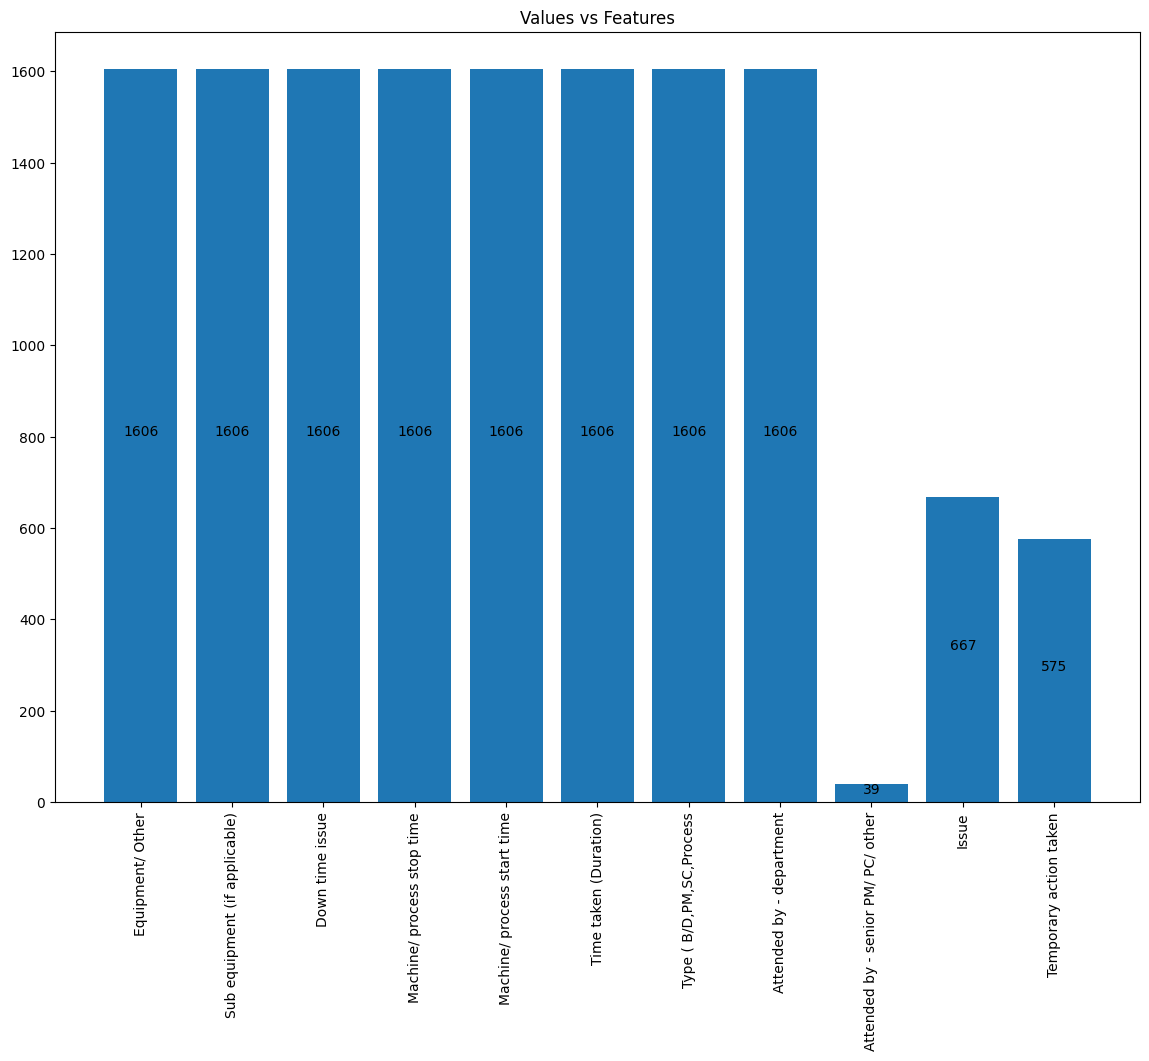




Nuber of non-null values
Index(['Equipment/ Other', 'Sub equipment (if applicable)', 'Down time issue',
       'Machine/ process stop time', 'Machine/ process start time',
       'Time taken (Duration)', 'Type ( B/D,PM,SC,Process',
       'Attended by - department', 'Attended by - senior PM/ PC/ other',
       'Issue', 'Temporary action taken'],
      dtype='object')



--> Dataset shape (rowsXcolumns)
(1609, 11)



--> Number of unique values
Equipment/ Other                       97
Sub equipment (if applicable)          97
Down time issue                       740
Machine/ process stop time            738
Machine/ process start time           769
Time taken (Duration)                 497
Type ( B/D,PM,SC,Process                4
Attended by - department               10
Attended by - senior PM/ PC/ other      8
Issue                                 466
Temporary action taken                442
dtype: int64





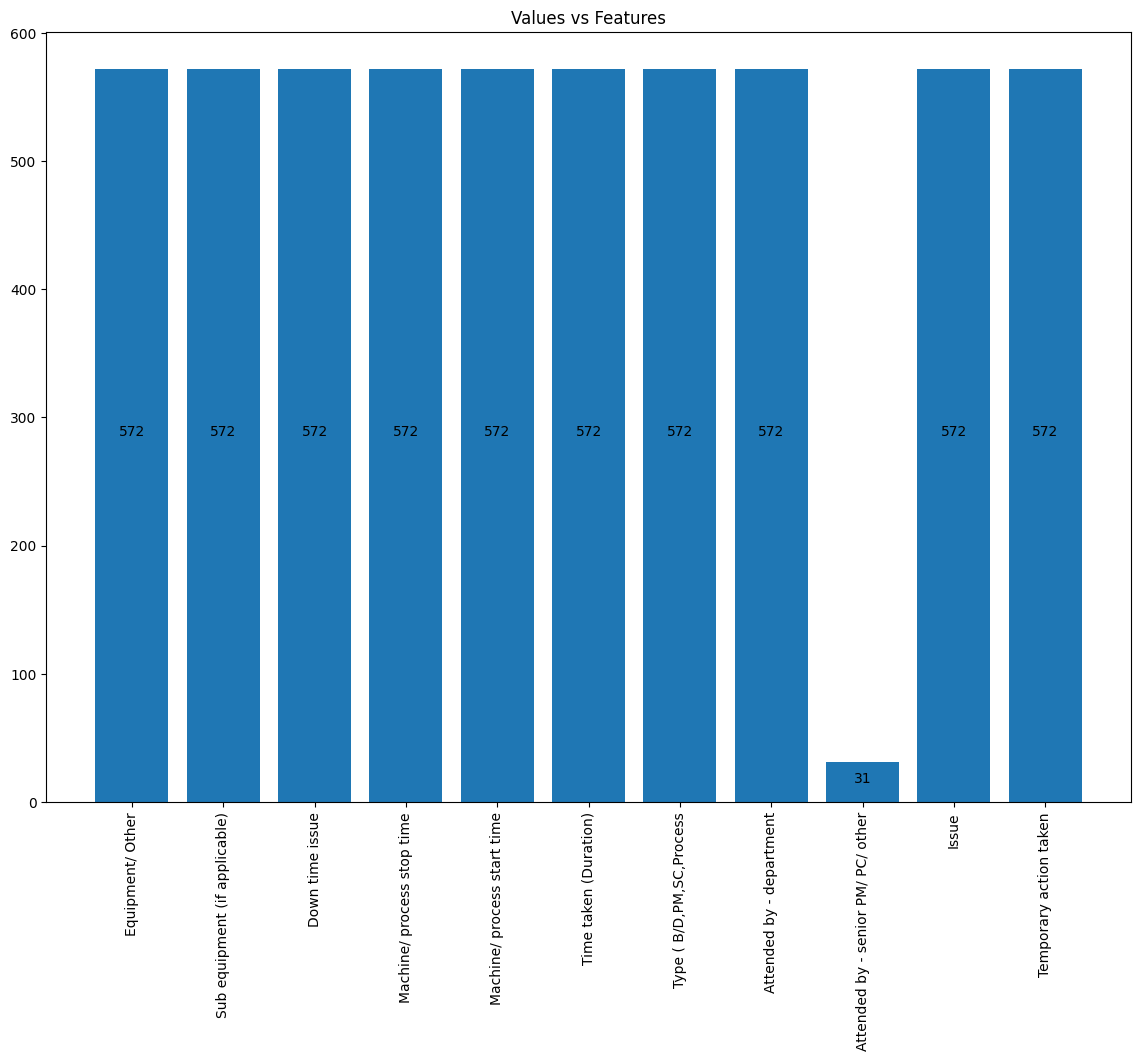

In [ ]:
#dir_path="Downtime Logs Casting.xlsx"
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

dir_path="//content//gdrive//MyDrive//Projects//MTP-I//Downtime Logs Casting.xlsx"

dataset=pd.read_excel(dir_path, sheet_name='Mech')

print("--> Dataset.....")
print(dataset.head())

#dataset.columns=dataset.values[0]

#dataset.drop(0, inplace=True)
print("--> Dataset shape (rowsXcolumns)")
print(dataset.shape)
print("\n\n")

dataset=dataset[dataset.columns[0:11]]


print("--> Dataset shape (rowsXcolumns)")
print(dataset.shape)
print("\n\n")

print("--> Dataset information")
print(dataset.info())
print("\n\n")

print("Total number of NULL values")
print(dataset.isnull().sum())
print("\n\n")


def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha='center')

plt.figure(figsize=(14,10))
plt.bar(dataset.notnull().sum().index, dataset.notnull().sum().values)
plt.title("Values vs Features")
plt.xticks(rotation='vertical')
add_labels(dataset.notnull().sum().index, dataset.notnull().sum().values)
plt.show()

print("\n\n")
print("Nuber of non-null values")
print(dataset.notnull().sum().index)
print("\n\n")
# the number of issues present - 667 out of 1606 data values
# the number of temporary action taken - 575
# No of issues where indusrty expert attended to solve it - 39
print("--> Dataset shape (rowsXcolumns)")
print(dataset.shape)
print("\n\n")

print("--> Number of unique values")
print(dataset.nunique())
print("\n\n")

"""# Removing rows which do not have issues and actions"""

dataset.dropna(subset=["Issue","Temporary action taken"], inplace=True)

dataset.reset_index(inplace=True, drop=True)

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha='center')

plt.figure(figsize=(14,10))
plt.bar(dataset.notnull().sum().index, dataset.notnull().sum().values)
plt.title("Values vs Features")
plt.xticks(rotation='vertical')
add_labels(dataset.notnull().sum().index, dataset.notnull().sum().values)
plt.show()

In [ ]:
# the number of issues present - 667 out of 1606 data values (Non NULL)
# the number of temporary action taken - 575 (Non NULL)
# Total number of issues with the solutions = 572 issues and respective solutions (Removing if there is no issue and solution present)

# Objective: Estimation of temporary action given the mechanical issue

Feature Engineering



In [ ]:
# Feature selection
# For the time being to generate the temporary action given an issue, consider equipment, sub equipment, downtime issue
# issue and temporary action - To predict the action these features will have significant impact

columns=dataset.columns

final_dataset=dataset[[columns[0], columns[1], columns[2], columns[9], columns[10]]]

final_columns=final_dataset.columns

In [ ]:
new_column_names={"Equipment/ Other":"Equipment", "Sub equipment (if applicable)":"SubEquipment","Down time issue":"Down Time Issue", "Issue":"Issue", "Temporary action taken":"Action"}
final_dataset = final_dataset.rename(columns=new_column_names)
final_columns=final_dataset.columns

In [ ]:
'''
column_to_move = final_dataset.pop("Down Time Issue")

# insert column with insert(location, column_name, column_value)

final_dataset.insert(3, "Down Time Issue", column_to_move)
'''

'\ncolumn_to_move = final_dataset.pop("Down Time Issue")\n\n# insert column with insert(location, column_name, column_value)\n\nfinal_dataset.insert(3, "Down Time Issue", column_to_move)\n'

In [ ]:
final_dataset

,Equipment,SubEquipment,Down Time Issue,Issue,Action
0,Sleeve,Mould,water leakage from spt side,Spt seal got damage as metal got inside resulting in huge water leakage,Spt seal changed
1,Sleeve,Mould,water leakage from spt side,Huge water leakage from spt taper plate gap in bottom,Spt taper plate bolts hole thread were tapped and tightly fitted with new bolts.
2,MTC,ccm,m/c under to mech,oil leakage from mtc gland,in mtc gland packing was given and mounting bolts were made tight
3,Mtc,Mtc,gland tightning,mtc gland leakage + m/c automatically getting down,mtc gland made tight
4,Mtc,Mtc,Mtc prob,casting time variation + m/c automatically getting down,mtc gland made tight + Sleeve changed
...,...,...,...,...,...
567,Diabola,Diabola,Diabola rail out & diabola wheel damage,Diabola Trolley B-Side V roller bearing damage,Roller changed
568,Extractor,Extractor,Extractor not clossing & back stopper broken,Extractor Stopper got out from hinge and plate got bend due to Extractor getting back in Jaw Open Position had impact with Stopper Plate,Plate made strainght and stopper height decreased by 10mm. OK in trial
569,Diabola,Diabola,Diabola derail,Diabola Trolley A-Side V-Wheel Derailed due to Jamming,V-Wheel Changed after putting the trolley back on track
570,Trough,Trough,A side tilting hose damage,A-Side Trough Tilting Hose Burst,Hose Changed


# Fault Taxonomy

In [ ]:
grouped_dataset=final_dataset.groupby(["Equipment", "SubEquipment", "Down Time Issue","Issue","Action"],as_index=False).agg(Action_count=("Action","count"))

In [ ]:
grouped_dataset

,Equipment,SubEquipment,Down Time Issue,Issue,Action,Action_count
0,Accumulator,Accumulator,hydrulic oil leakage from aquimlater cylinder hose,Huge Oil Leakage from MTC stand Accumulator Dummy Fitting as fitting came out while it was tried to tighten as it was loose,Spare fitting was not fitting so Fitting Welded,1
1,CCM,CCM,Spigot metal guard welding,Boggie spt chute fell off,spt chute fitted after cleaning,1
2,CCM,CCM,Under mechanical,Core Loader - Sand Stick on Pipe Face,Core Loader Changed and Aligned. Compression 15mm,1
3,CCM,CCM,bogie wheel adjustment,Sleeve Change (As per Plan),1. Bogie Wheel A-side both wheel packing done (5mm Ring)\n2. All Wheel Ploy Check\n3. Extractor Centering from Bore\n4. MTC Gland Tight,1
4,CCM,CCM,bogie wheel change,Pipe drawn,a side both skt and spt flat wheel with collar replaced,1
...,...,...,...,...,...,...
550,uli unit,uli unit,dry powder uli dropping prob,Dry Powder Feed Problem,Screw Changing work done with lock nut adjusted but not sloved so powder pipe loose nipple position hole decreased by washer welding,1
551,uli unit,uli unit,dry powder uli dropping prob,Dry Powder Feed Problem,Screw feeder pipe line fitted and trial NOT OK so screw check nut adjusted and thread sleeve lock by welding & trial OK,1
552,uli unit,uli unit,dry powder uli dropping prob,Dry Powder pipe hole position metal Jam,Metal Cleaned & trial taken OK,1
553,uli unit,uli unit,dry uli dropping prob,Dry Powder discontinuous Flow,Screw Feeder adjusting Nut adjusted & vibrator changed,1


# Prompt Engineering

In [ ]:
grouped_columns=grouped_dataset.columns.values.tolist()

In [ ]:
grouped_columns

['Equipment',
 'SubEquipment',
 'Down Time Issue',
 'Issue',
 'Action',
 'Action_count']

In [ ]:
filtered_dataset=[]
for i in range(len(grouped_dataset)):
    inp=f"The solution to resolve the issue {grouped_dataset.loc[i,grouped_columns[3]]} is {grouped_dataset.loc[i,grouped_columns[4]]}"
    filtered_dataset.append(inp)

In [ ]:
corpus=filtered_dataset

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()

In [ ]:
def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)

    total_words = len(tokenizer.word_index) + 1

    ## convert data to a token sequence
    input_sequences = []
    for issue in corpus:
        token_list = tokenizer.texts_to_sequences([issue])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words
inp_sequences, total_words = get_sequence_of_tokens(corpus)


In [ ]:
total_words

770

Padding the sequence

In [ ]:
from keras.utils import pad_sequences
import keras.utils as ku

In [ ]:

def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    print(max_sequence_len)
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)

    return predictors, label, max_sequence_len


In [ ]:
predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

56


# Model training and hyperparameter tuning

In [ ]:

# Keras models are used to work with Neural networks
from keras.layers import Embedding, LSTM, Bidirectional,Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential

def create_model(max_sequence_len, total_words, vector_size, units, dropout):
    input_len = max_sequence_len - 1
    model = Sequential()
    # Add Input Embedding Layer
    model.add(Embedding(total_words, vector_size, input_length=input_len))
    # Add Hidden Layer 1 - LSTM Layer
    # model.add(LSTM(units))
    model.add(Bidirectional(LSTM(units, return_sequences=True)))
    model.add(Bidirectional(LSTM(units)))
    #set the 10% of activation of neurons to zero to prevent overfitting - regularization technique
    model.add(Dropout(dropout))
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model


In [ ]:
vector_size=100
units=128
dropout=0.1

model=create_model(max_sequence_len,total_words, vector_size,units, dropout)
model.fit(predictors, label, epochs=20,verbose=1)
loss, accuracy = model.evaluate(predictors, label)


In [ ]:
model.save('model.h5')

# Inference

In [ ]:
final_columns[3]

'Issue'

In [ ]:
inp=f'''What is the solution to resolve the issue {final_dataset.loc[10, final_columns[3]]}'''

In [ ]:

def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        #predicted = model.predict_classes(token_list, verbose=0)
        predict_x=model.predict(token_list, verbose=0)
        classes_x=np.argmax(predict_x,axis=1)
        print(classes_x)

        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == classes_x:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [ ]:
print("issue: " + inp.lower())
print("Solution: "+final_dataset.loc[10, final_columns[4]])
print (generate_text(inp.lower(), 4, model, max_sequence_len))

issue: what is the solution to resolve the issue a side trough supporting roller
Solution: roller changed
[23]
[6]
[17]
[7]
What Is The Solution To Resolve The Issue A Side Trough Supporting Roller Jam Is Roller Changed
